# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_04I/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ix264-00001-00006,"['--disable-gpl', '--disable-thread', '--bit-d...",65.706,63.391,2.155,2879792
1,ix264-00001-00015,"['--disable-asm', '--disable-thread', '--bit-d...",33.756,31.833,1.824,2271288
2,ix264-00001-00012,"['--disable-thread', '--disable-win32thread', ...",64.697,62.355,2.163,2825856
3,ix264-00001-00014,"['--disable-asm', '--disable-gpl', '--disable-...",18.278,17.073,1.147,1554512
4,ix264-00001-00005,"['--disable-gpl', '--disable-thread', '--bit-d...",70.390,67.925,2.288,3094224
...,...,...,...,...,...,...
375,ix264-00020-00016,"['--bit-depth=all', '--chroma-format=all', '--...",72.971,70.300,2.485,3108808
376,ix264-00020-00013,"['--disable-gpl', '--disable-thread', '--disab...",36.574,35.128,1.360,1879304
377,ix264-00020-00018,"['--disable-asm', '--disable-interlaced', '--b...",18.606,17.245,1.313,1539400
378,ix264-00020-00003,"['--disable-asm', '--disable-thread', '--disab...",18.348,17.180,1.134,1554512


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size,Br0,Br1,Br2
0,ix264-00001-00006,"['--disable-gpl', '--disable-thread', '--bit-d...",65.706,63.391,2.155,2879792,ix264,00001,00006
1,ix264-00001-00015,"['--disable-asm', '--disable-thread', '--bit-d...",33.756,31.833,1.824,2271288,ix264,00001,00015
2,ix264-00001-00012,"['--disable-thread', '--disable-win32thread', ...",64.697,62.355,2.163,2825856,ix264,00001,00012
3,ix264-00001-00014,"['--disable-asm', '--disable-gpl', '--disable-...",18.278,17.073,1.147,1554512,ix264,00001,00014
4,ix264-00001-00005,"['--disable-gpl', '--disable-thread', '--bit-d...",70.390,67.925,2.288,3094224,ix264,00001,00005
...,...,...,...,...,...,...,...,...,...
375,ix264-00020-00016,"['--bit-depth=all', '--chroma-format=all', '--...",72.971,70.300,2.485,3108808,ix264,00020,00016
376,ix264-00020-00013,"['--disable-gpl', '--disable-thread', '--disab...",36.574,35.128,1.360,1879304,ix264,00020,00013
377,ix264-00020-00018,"['--disable-asm', '--disable-interlaced', '--b...",18.606,17.245,1.313,1539400,ix264,00020,00018
378,ix264-00020-00003,"['--disable-asm', '--disable-thread', '--disab...",18.348,17.180,1.134,1554512,ix264,00020,00003


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                          \
Br1        00001   00002   00003   00004   00005   00006   00007   00008   
Br2                                                                        
00001        NaN  38.064  38.324  38.115  38.048  38.033  38.107  38.141   
00002     18.978     NaN  18.625  18.694  18.619  18.557  18.632  18.572   
00003     18.916  18.433     NaN  18.418  18.404  18.279  18.429  18.378   
00004     31.468  31.430  31.397     NaN  31.465  31.490  31.396  31.502   
00005     70.390  70.028  70.044  70.222     NaN  70.291  70.106  70.158   
00006     65.706  66.176  65.694  65.828  66.012     NaN  65.804  65.738   
00007     17.828  17.802  17.762  17.925  17.815  17.781     NaN  17.902   
00008     34.555  34.696  34.626  34.801  34.688  34.693  34.654     NaN   
00009     40.166  40.311  40.220  40.334  40.259  40.115  40.311  40.555   
00010     34.100  34.231  34.158  34.308  34.173  34.176  34.235  34.362   
00011     35.962  34.718  34.733  34.776  34.717  34.676  34.713  34.863   
00012     64.697  64.838  64.667  64.871  65.124  64.887  64.829  65.961   
00013     37.810  36.545  36.567  36.608  36.497  36.495  36.560  36.525   
00014     18.278  18.422  18.417  18.356  18.338  18.346  18.417  18.473   
00015     33.756  34.039  33.758  33.894  33.902  33.855  33.822  33.878   
00016     73.255  70.942  70.988  71.335  71.071  71.089  71.064  71.218   
00017     34.099  34.138  34.144  34.340  34.242  34.187  34.231  34.432   
00018     18.861  18.604  18.477  18.577  18.498  18.502  18.503  18.510   
00019     43.406  38.235  38.113  38.261  38.265  38.223  38.342  38.387   
00020     31.429  31.394  31.517  31.485  31.492  31.564  31.534  31.661   

                                                                               \
Br1     00009   00010   00011   00012   00013   00014   00015   00016   00017   
Br2                                                                             
00001  38.207  38.038  38.139  38.104  37.986  38.000  37.995  38.056  38.059   
00002  18.581  18.587  18.568  18.600  18.512  18.555  18.600  18.511  18.647   
00003  18.346  18.337  18.272  18.232  18.222  18.250  18.240  18.317  18.856   
00004  31.367  31.410  31.551  31.447  31.415  31.323  31.513  31.426  31.310   
00005  70.071  70.188  70.456  70.089  70.104  69.850  69.929  69.705  69.932   
00006  65.773  65.604  65.777  65.700  65.619  65.555  65.460  65.696  65.506   
00007  17.817  17.746  17.788  17.744  17.761  17.807  17.771  17.699  17.736   
00008  34.648  34.737  34.656  34.695  34.535  34.632  34.527  34.460  35.017   
00009     NaN  40.280  40.142  40.150  40.108  40.167  40.109  40.103  40.219   
00010  34.513     NaN  34.125  34.114  34.177  34.131  34.155  34.033  34.152   
00011  34.568  34.663     NaN  34.517  34.583  34.487  34.526  34.439  34.675   
00012  64.891  64.820  64.812     NaN  64.609  64.661  64.529  64.503  64.643   
00013  36.513  36.435  36.374  36.296     NaN  36.346  36.341  36.386  36.382   
00014  18.314  18.369  18.342  18.279  18.321     NaN  18.210  18.248  18.232   
00015  33.814  33.900  33.808  33.822  33.719  33.697     NaN  33.693  33.681   
00016  70.949  70.915  71.436  71.033  70.872  70.624  71.042     NaN  70.893   
00017  34.082  34.161  34.104  34.122  34.114  34.108  34.035  34.102     NaN   
00018  18.480  18.452  18.428  18.438  18.450  18.396  18.335  18.383  19.744   
00019  38.172  38.166  38.226  38.220  38.121  38.113  38.104  38.101  38.212   
00020  31.539  31.482  31.479  31.454  31.364  31.351  31.530  31.412  31.342   

                               
Br1     00018   00019   00020  
Br2                            
00001  38.378  38.085  39.306  
00002  18.551  18.570  18.555  
00003  18.234  18.281  18.348  
00004  31.412  31.540  31.559  
00005  70.051  70.021  70.338  
00006  65.751  65.642  65.739  
00007  17.841  17.766  17.901  
00008  34.596  34.629  36.139  
00009  40.141  40.201  42.101  
00010  34

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00013)"
00002,"(Build Time, 00016)"
00003,"(Build Time, 00013)"
00004,"(Build Time, 00017)"
00005,"(Build Time, 00016)"
00006,"(Build Time, 00015)"
00007,"(Build Time, 00016)"
00008,"(Build Time, 00016)"


In [6]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0   
00002   1488112.0        NaN  1488112.0  1488112.0  1488112.0  1488112.0   
00003   1554512.0  1554512.0        NaN  1554512.0  1554512.0  1554512.0   
00004   1720304.0  1720304.0  1720304.0        NaN  1720304.0  1720304.0   
00005   3094224.0  3094224.0  3094224.0  3094224.0        NaN  3094224.0   
00006   2879792.0  2879792.0  2879792.0  2879792.0  2879792.0        NaN   
00007   1440352.0  1440352.0  1440352.0  1440352.0  1440352.0  1440352.0   
00008   1866608.0  1866608.0  1866608.0  1866608.0  1866608.0  1866608.0   
00009   2046072.0  2046072.0  2046072.0  2046072.0  2046072.0  2046072.0   
00010   2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00011   2285496.0  2285496.0  2285496.0  2285496.0  2285496.0  2285496.0   
00012   2825856.0  2825856.0  2825856.0  2825856.0  2825856.0  2825856.0   
00013   1879304.0  1879304.0  1879304.0  1879304.0  1879304.0  1879304.0   
00014   1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00015   2271288.0  2271288.0  2271288.0  2271288.0  2271288.0  2271288.0   
00016   3108808.0  3108808.0  3108808.0  3108808.0  3108808.0  3108808.0   
00017   2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00018   1539400.0  1539400.0  1539400.0  1539400.0  1539400.0  1539400.0   
00019   1942672.0  1942672.0  1942672.0  1942672.0  1942672.0  1942672.0   
00020   1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0   
00002  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0   
00003  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00004  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   
00005  3094224.0  3094224.0  3094224.0  3094224.0  3094224.0  3094224.0   
00006  2879792.0  2879792.0  2879792.0  2879792.0  2879792.0  2879792.0   
00007        NaN  1440352.0  1440352.0  1440352.0  1440352.0  1440352.0   
00008  1866608.0        NaN  1866608.0  1866608.0  1866608.0  1866608.0   
00009  2046072.0  2046072.0        NaN  2046072.0  2046072.0  2046072.0   
00010  2278824.0  2278824.0  2278824.0        NaN  2278824.0  2278824.0   
00011  2285496.0  2285496.0  2285496.0  2285496.0        NaN  2285496.0   
00012  2825856.0  2825856.0  2825856.0  2825856.0  2825856.0        NaN   
00013  1879304.0  1879304.0  1879304.0  1879304.0  1879304.0  1879304.0   
00014  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00015  2271288.0  2271288.0  2271288.0  2271288.0  2271288.0  2271288.0   
00016  3108808.0  3108808.0  3108808.0  3108808.0  3108808.0  3108808.0   
00017  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0  2278824.0   
00018  1539400.0  1539400.0  1539400.0  1539400.0  1539400.0  1539400.0   
00019  1942672.0  1942672.0  1942672.0  1942672.0  1942672.0  1942672.0   
00020  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0  1938928.0   
00002  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0  1488112.0   
00003  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0  1554512.0   
00004  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0  1720304.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,39.306,38.167632,37.986
00002,18.978,18.606000,18.511
00003,18.916,18.378526,18.222
00004,31.559,31.443211,31.310
00005,70.456,70.103842,69.705
00006,66.176,65.725263,65.460
00007,17.925,17.799579,17.699
00008,36.139,34.736000,34.460


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00016,73.255,71.251158,70.624
00005,70.456,70.103842,69.705
00006,66.176,65.725263,65.460
00012,67.891,64.990737,64.503
00009,42.101,40.315368,40.103
00019,43.406,38.550105,38.101
00001,39.306,38.167632,37.986
00013,37.810,36.529316,36.296


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

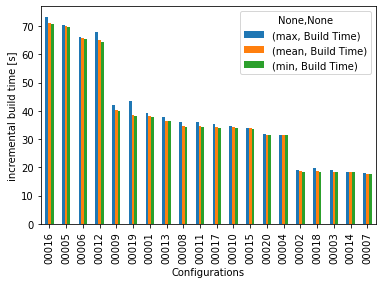

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

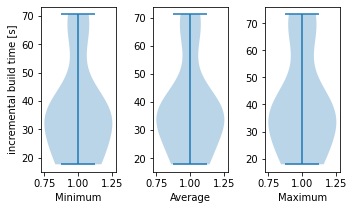

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a csv file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,38.064,38.324,38.115,38.048,38.033,38.107,38.141,38.207,38.038,38.139,38.104,37.986,38.000,37.995,38.056,38.059,38.378,38.085,39.306
00002,18.978,NaN,18.625,18.694,18.619,18.557,18.632,18.572,18.581,18.587,18.568,18.600,18.512,18.555,18.600,18.511,18.647,18.551,18.570,18.555
00003,18.916,18.433,NaN,18.418,18.404,18.279,18.429,18.378,18.346,18.337,18.272,18.232,18.222,18.250,18.240,18.317,18.856,18.234,18.281,18.348
00004,31.468,31.430,31.397,NaN,31.465,31.490,31.396,31.502,31.367,31.410,31.551,31.447,31.415,31.323,31.513,31.426,31.310,31.412,31.540,31.559
00005,70.390,70.028,70.044,70.222,NaN,70.291,70.106,70.158,70.071,70.188,70.456,70.089,70.104,69.850,69.929,69.705,69.932,70.051,70.021,70.338
00006,65.706,66.176,65.694,65.828,66.012,NaN,65.804,65.738,65.773,65.604,65.777,65.700,65.619,65.555,65.460,65.696,65.506,65.751,65.642,65.739
00007,17.828,17.802,17.762,17.925,17.815,17.781,NaN,17.902,17.817,17.746,17.788,17.744,17.761,17.807,17.771,17.699,17.736,17.841,17.766,17.901
00008,34.555,34.696,34.626,34.801,34.688,34.693,34.654,NaN,34.648,34.737,34.656,34.695,34.535,34.632,34.527,34.460,35.017,34.596,34.629,36.139
00009,40.166,40.311,40.220,40.334,40.259,40.115,40.311,40.555,NaN,40.280,40.142,40.150,40.108,40.167,40.109,40.103,40.219,40.141,40.201,42.101
